Accuracy: 91.81%


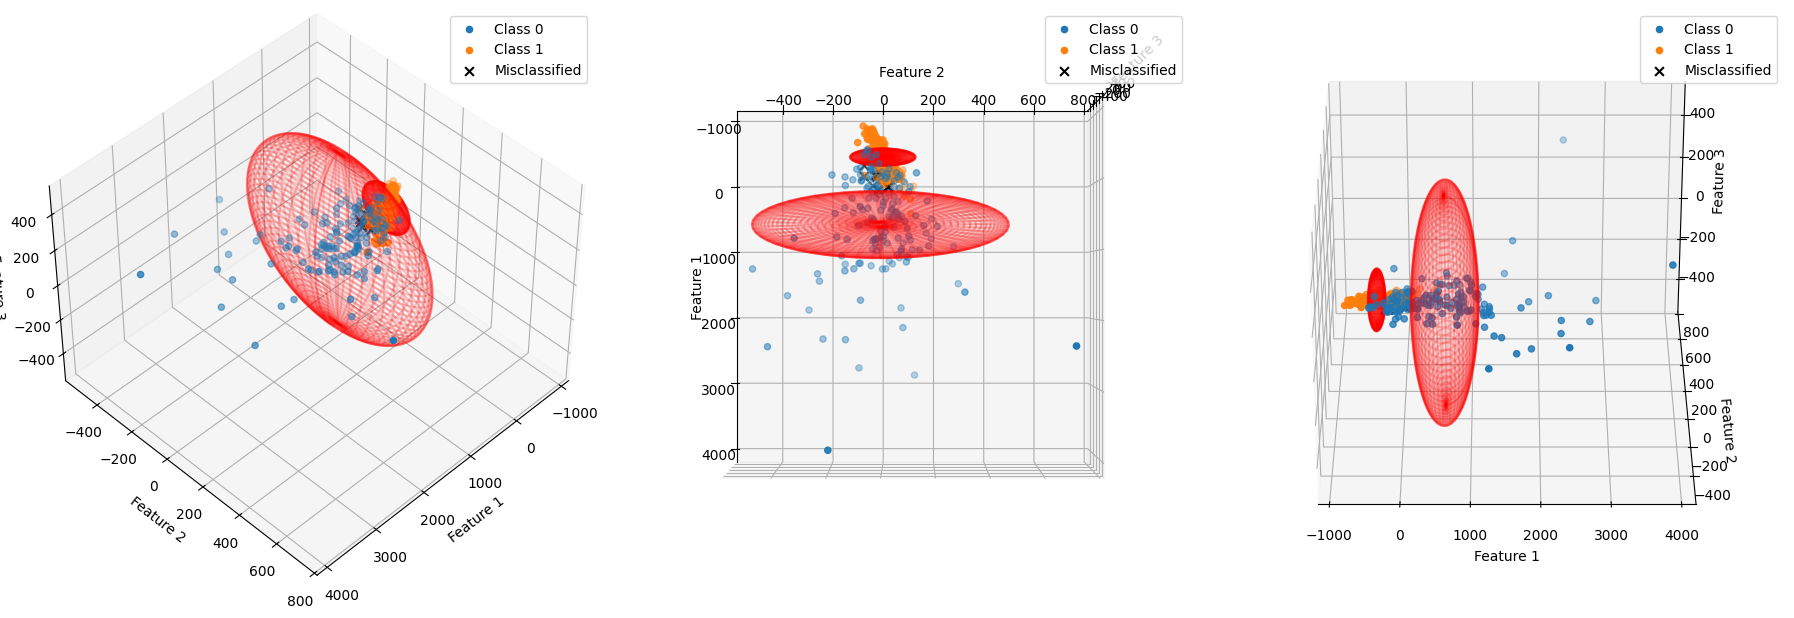

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits

class SphericalClassifier:
    def __init__(self, radius_multiplier=0.5):
        """
        Initializes the SphericalClassifier with a given radius multiplier.
        The radius_multiplier will scale the radius of the spheres used to classify the data.
        """
        self.centroids = []  # List to store the centroids of each class
        self.radii = []  # List to store the radii of each class' spherical cluster
        self.labels = []  # List to store the labels corresponding to the centroids
        self.radius_multiplier = radius_multiplier  # A multiplier for scaling the radius of the spheres

    def fit(self, X_train, y_train):
        """
        Fit the training data into spherical clusters. For each unique class label,
        it computes a centroid and the radius of the spherical decision boundary.
        """
        for label in np.unique(y_train):  # Loop through each unique class label
            class_points = X_train[y_train == label]  # Extract points corresponding to the current class label
            centroid = np.mean(class_points, axis=0)  # Calculate the centroid (mean) of the points in this class
            distances = np.linalg.norm(class_points - centroid, axis=1)  # Compute the distance of each point from the centroid
            radius = np.max(distances) * self.radius_multiplier  # Set the radius as the maximum distance, scaled by the multiplier
            self.centroids.append(centroid)  # Store the centroid
            self.radii.append(radius)  # Store the radius
            self.labels.append(label)  # Store the label corresponding to the centroid

    def predict(self, X_test):
        """
        Predict the labels for the test data based on the spherical classifier.
        Each point is classified by checking if it's inside any of the spheres (defined by centroids and radii),
        or by assigning the nearest centroid if it's outside all spheres.
        """
        predictions = []  # List to store predicted labels for each test point
        for point in X_test:  # Iterate over each test point
            found_label = None  # Variable to store the label if the point is inside a sphere
            min_distance = float('inf')  # Initialize minimum distance as infinity for comparison
            nearest_label = None  # Variable to store the label of the nearest centroid
            for i, centroid in enumerate(self.centroids):  # Loop through each class's centroid
                distance = np.linalg.norm(point - centroid)  # Calculate the Euclidean distance from the point to the centroid
                if distance <= self.radii[i]:  # Check if the point is inside the spherical decision boundary
                    found_label = self.labels[i]  # Assign the label of the class if inside the sphere
                    break  # Exit the loop once we find a sphere that contains the point
                # If the point is not inside any sphere, we track the nearest centroid
                if distance < min_distance:
                    min_distance = distance  # Update the minimum distance
                    nearest_label = self.labels[i]  # Update the nearest centroid's label
            if found_label is None:  # If no sphere contained the point, assign the label of the nearest centroid
                found_label = nearest_label
            predictions.append(found_label)  # Append the predicted label for the current point

        return np.array(predictions)  # Return the predictions as a numpy array

    def plot_spheres_from_different_angles(self, X_train, y_train, X_test, y_test, y_pred):
        """
        Plot the spherical clusters from three different angles in 3D space.
        Misclassified points are displayed in black.
        """
        fig = plt.figure(figsize=(18, 6))  # Create a larger figure for 3 subplots

        # Create three subplots with 1 row and 3 columns
        ax1 = fig.add_subplot(131, projection='3d')
        ax2 = fig.add_subplot(132, projection='3d')
        ax3 = fig.add_subplot(133, projection='3d')

        # Plot the training data for each class (same for all subplots)
        for label in np.unique(y_train):  # Loop through each class label
            class_points = X_train[y_train == label]  # Extract points corresponding to the current class label
            ax1.scatter(class_points[:, 0], class_points[:, 1], class_points[:, 2], label=f"Class {label}")  # Plot the points
            ax2.scatter(class_points[:, 0], class_points[:, 1], class_points[:, 2], label=f"Class {label}")
            ax3.scatter(class_points[:, 0], class_points[:, 1], class_points[:, 2], label=f"Class {label}")

        # Plot the spherical decision boundaries for each class (same for all subplots)
        u = np.linspace(0, 2 * np.pi, 100)  # Create an array of angles for the spherical plot
        v = np.linspace(0, np.pi, 100)  # Create an array of angles for the spherical plot
        for i, centroid in enumerate(self.centroids):  # Loop through each centroid
            # Parametrize the sphere and shift it to the centroid's location
            x = self.radii[i] * np.outer(np.cos(u), np.sin(v)) + centroid[0]
            y = self.radii[i] * np.outer(np.sin(u), np.sin(v)) + centroid[1]
            z = self.radii[i] * np.outer(np.ones(np.size(u)), np.cos(v)) + centroid[2]

            # Plot the sphere's wireframe
            ax1.plot_wireframe(x, y, z, color='r', alpha=0.2)
            ax2.plot_wireframe(x, y, z, color='r', alpha=0.2)
            ax3.plot_wireframe(x, y, z, color='r', alpha=0.2)

        # Plot misclassified test points in black
        misclassified_points = X_test[y_pred != y_test]
        misclassified_labels = y_test[y_pred != y_test]
        ax1.scatter(misclassified_points[:, 0], misclassified_points[:, 1], misclassified_points[:, 2], color='black', label="Misclassified", s=40, marker='x')
        ax2.scatter(misclassified_points[:, 0], misclassified_points[:, 1], misclassified_points[:, 2], color='black', label="Misclassified", s=40, marker='x')
        ax3.scatter(misclassified_points[:, 0], misclassified_points[:, 1], misclassified_points[:, 2], color='black', label="Misclassified", s=40, marker='x')

        # Set different view angles for each subplot
        ax1.view_init(elev=45, azim=45)  # View from the front-right
        ax2.view_init(elev=90, azim=0)   # View from above
        ax3.view_init(elev=30, azim=-90) # View from the front-left

        # Set labels
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        ax1.set_zlabel('Feature 3')

        ax2.set_xlabel('Feature 1')
        ax2.set_ylabel('Feature 2')
        ax2.set_zlabel('Feature 3')

        ax3.set_xlabel('Feature 1')
        ax3.set_ylabel('Feature 2')
        ax3.set_zlabel('Feature 3')

        # Show legends and plot
        ax1.legend()
        ax2.legend()
        ax3.legend()

        plt.tight_layout()  # Ensure there is no overlap between subplots
        plt.show()  # Display the plots


# Load the Iris dataset (a common dataset for classification tasks)
iris = load_breast_cancer() # Load the Iris dataset from sklearn
X = iris.data  # Extract the feature matrix (4 features)
y = iris.target  # Extract the target labels (3 classes)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce the features to 3 components for 3D visualization, **after** splitting the data
pca = PCA(n_components=3)  # Initialize PCA to reduce data to 3 components
X_train_pca = pca.fit_transform(X_train)  # Apply PCA transformation to the training set
X_test_pca = pca.transform(X_test)  # Apply the same transformation to the test set

# Create the SphericalClassifier instance with a radius multiplier of 0.15
classifier = SphericalClassifier(radius_multiplier=0.15)

# Fit the classifier to the training data
classifier.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_pca)

# Evaluate the performance of the classifier by calculating accuracy
accuracy = np.mean(y_pred == y_test)  # Compute the fraction of correctly predicted labels
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy as a percentage

# Plot the spheres and training data in 3D from three different angles
classifier.plot_spheres_from_different_angles(X_train_pca, y_train, X_test_pca, y_test, y_pred)
